# Python Packages, APIs and Code Organization

In this lesson, we'll explore how to work with packages in Python, understand APIs, and learn best practices for organizing code across multiple files. We'll see how to leverage both built-in and third-party packages to extend Python's capabilities.

## Built-in Packages

Python comes with a rich set of built-in packages. Let's explore some common ones:

In [1]:
# Import built-in packages
import math
import statistics 
import random

# Generate some random data for our examples
data = [random.randint(1, 100) for _ in range(20)]

data

[85, 24, 53, 82, 100, 75, 90, 6, 4, 67, 92, 44, 100, 6, 57, 98, 14, 26, 80, 20]

In [2]:
# Using math functions
print(f"Square root of 16: {math.sqrt(16)}")
print(f"Pi value: {math.pi}")
print(f"Exponential of 2: {math.exp(2)}")

Square root of 16: 4.0
Pi value: 3.141592653589793
Exponential of 2: 7.38905609893065


In [3]:
# Using statistics functions
print(f"\nMean of data: {statistics.mean(data)}")
print(f"Median of data: {statistics.median(data)}")
print(f"Standard deviation: {statistics.stdev(data)}")


Mean of data: 56.15
Median of data: 62.0
Standard deviation: 35.17217051800142


In [4]:
# Using random functions
print(f"\nRandom choice from data: {random.choice(data)}")


Random choice from data: 44


In [5]:
print(f"Random sample of 5 numbers: {random.sample(data, 5)}")

Random sample of 5 numbers: [80, 24, 82, 98, 6]


In [6]:
from ai_tools import ask_ai, ask_local_ai #?????

In [7]:
ask_local_ai("Explain to my friend AS who is learning about LLM apis why you don't need an API key to use local LLM models. ")

"AS! So, when it comes to using Large Language Models (LLMs) locally, without relying on cloud-based APIs, there are a few reasons why an API key isn't always required.\n\nFirstly, many LLMs are pre-trained and fine-tuned using large amounts of data. These models can be trained and then saved in a format that's easily distributable and usable by local applications. As a result, you don't need to authenticate your requests or obtain an API key to use the model locally.\n\nSecondly, when working with LLMs locally, you typically have full access to the underlying data and computational resources. This means you can load the pre-trained model directly into memory without needing to authenticate your usage through an API key.\n\nThirdly, some local LLM implementations might be based on open-source or self-hosted solutions that don't require authentication for local use cases. These models are often designed specifically for deployment in private environments, such as internal applications o

## Working with Third-Party Packages

Third-party packages extend Python's functionality. Let's work with some popular ones:

Weather Statistics:
                      date  temperature
count                   32    32.000000
mean   2024-01-16 12:00:00    19.519769
min    2024-01-01 00:00:00     4.858960
25%    2024-01-08 18:00:00    17.778249
50%    2024-01-16 12:00:00    20.431805
75%    2024-01-24 06:00:00    22.916791
max    2024-02-01 00:00:00    27.473991
std                    NaN     5.195840


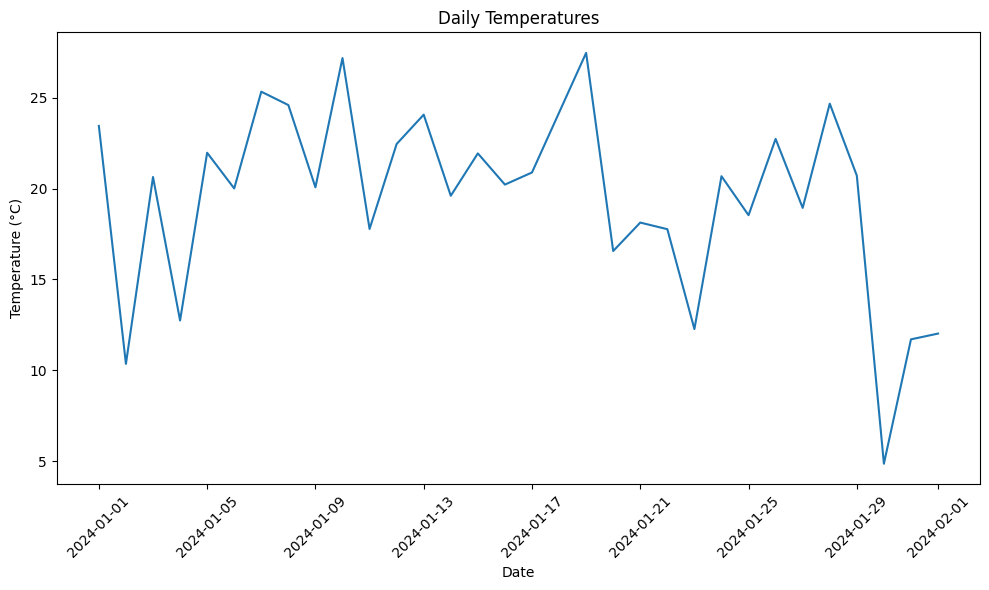

In [2]:
# Import third-party packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create sample data
dates = pd.date_range(start='2024-01-01', end='2024-02-01', freq='D')
temperatures = np.random.normal(20, 5, size=len(dates))

# Create a DataFrame
weather_data = pd.DataFrame({
    'date': dates,
    'temperature': temperatures
})

# Basic data wrangling
weather_stats = weather_data.describe()
print("Weather Statistics:")
print(weather_stats)

# Create a visualization
plt.figure(figsize=(10, 6))
plt.plot(weather_data['date'], weather_data['temperature'])
plt.title('Daily Temperatures')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Code Organization with Custom Modules

**WALKTHROUGH OF THE `./ai_tools.py` module:**

 The `ai_tools.py` module contains several key functions:

 1. `import` statements at the top:
     - `from openai import OpenAI`: For accessing OpenAI's API
     - `import anthropic`: For accessing Anthropic's Claude API
     - `import ollama`: For running local AI models
     - `import json`: For parsing JSON responses
 
 2. `ask_ai(prompt, model_name)`: Sends prompts to cloud AI models like GPT-4 and Claude
    - Uses OpenAI and Anthropic APIs
    - Returns text response from the AI

 3. `ask_local_ai(prompt, model_name)`: Sends prompts to locally-run AI models
    - Uses Ollama API for local LLMs
    - Can return structured JSON or plain text

 4. Helper functions for parsing AI outputs:
    - `parse_dates_list()`: Converts string output to Python list of dates
    - `parse_json_output()`: Safely parses JSON responses from AI

Let's create a separate module for weather-related functions. First, create a file called `weather_utils.py`:

In [ ]:
# weather_utils.py

def celsius_to_fahrenheit(celsius):
    """Convert Celsius to Fahrenheit"""
    return (celsius * 9/5) + 32

def calculate_heat_index(temperature, humidity):
    """Calculate heat index based on temperature (°F) and humidity (%)"""
    if temperature < 80:
        return temperature
    
    heat_index = -42.379 + 2.04901523 * temperature + 10.14333127 * humidity
    heat_index -= 0.22475541 * temperature * humidity
    heat_index -= 6.83783e-3 * temperature**2
    heat_index -= 5.481717e-2 * humidity**2
    heat_index += 1.22874e-3 * temperature**2 * humidity
    heat_index += 8.5282e-4 * temperature * humidity**2
    heat_index -= 1.99e-6 * temperature**2 * humidity**2
    
    return round(heat_index, 2)

Now let's use our custom module:

In [8]:
# Import the pandas module for data manipulation
import pandas as pd
import numpy as np
# Import our custom module
from weather_utils import celsius_to_fahrenheit, calculate_heat_index

weather_data = pd.DataFrame({
    'date': pd.date_range(start='2024-01-01', periods=100, freq='D'),
    'temperature': np.random.uniform(0, 30, size=100)  # Random temperatures in Celsius
})

# Convert our temperature data to Fahrenheit
weather_data['temperature_f'] = weather_data['temperature'].apply(celsius_to_fahrenheit)

# Add random humidity data
weather_data['humidity'] = np.random.uniform(30, 80, size=len(weather_data))

# Calculate heat index
weather_data['heat_index'] = weather_data.apply(
    lambda x: calculate_heat_index(x['temperature_f'], x['humidity']), 
    axis=1
)

print("\nSample of weather data with heat index:")
print(weather_data.head())


Sample of weather data with heat index:
        date  temperature  temperature_f   humidity  heat_index
0 2024-01-01    20.318835      68.573903  37.092948   68.573903
1 2024-01-02    26.590865      79.863557  47.872554   79.863557
2 2024-01-03     0.340331      32.612596  56.443950   32.612596
3 2024-01-04     7.153789      44.876820  70.574083   44.876820
4 2024-01-05    22.697382      72.855287  55.183043   72.855287


## Working with APIs

Let's explore how to work with APIs using the OpenWeatherMap API as an example:

In [11]:
import requests
import json
import os
from datetime import datetime

def get_weather_data(city, api_key):
    """
    Fetch weather data for a given city using OpenWeatherMap API
    """
    base_url = "http://api.openweathermap.org/data/2.5/weather"
    params = {
        "q": city,
        "appid": api_key,
        "units": "metric"  # Use metric units
    }
    
    try:
        response = requests.get(base_url, params=params)
        response.raise_for_status()  # Raise an exception for bad status codes
        
        data = response.json()
        
        # Extract relevant information
        weather_info = {
            "city": city,
            "temperature": data["main"]["temp"],
            "humidity": data["main"]["humidity"],
            "description": data["weather"][0]["description"],
            "timestamp": datetime.fromtimestamp(data["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        }
        
        return weather_info
    
    except requests.exceptions.RequestException as e:
        print(f"Error fetching weather data: {e}")
        return None

# Example usage (you'll need your own API key)
api_key = os.environ["OPEN_WEATHER_API_KEY"]  # Replace with your actual API key
cities = ["London", "New York", "Tokyo", "Sydney"]

weather_results = []
for city in cities:
    result = get_weather_data(city, api_key)
    if result:
        weather_results.append(result)

# Convert results to DataFrame
weather_df = pd.DataFrame(weather_results)
print("\nCurrent weather in different cities:")
print(weather_df)


Current weather in different cities:
       city  temperature  humidity      description            timestamp
0    London         5.62        88  overcast clouds  2025-02-03 10:35:00
1  New York        -0.01        90        clear sky  2025-02-03 10:39:50
2     Tokyo         6.82        71    broken clouds  2025-02-03 10:34:55
3    Sydney        24.41        77       few clouds  2025-02-03 10:35:40


## Installing Packages with pip

Here's how to install packages using pip (run these commands in your terminal):

# Install packages

```pip install requests
pip install pandas
pip install matplotlib
pip install beautifulsoup4

# Install specific versions
pip install requests==2.28.1

# Upgrade packages
pip install --upgrade requests

# List installed packages
pip list```

## Web Scraping Example

Let's create a simple web scraping example using BeautifulSoup:

In [4]:
import requests
from bs4 import BeautifulSoup

def scrape_oreilly_ai_programming_news(url):
    """
    Scrape AI and programming-related content from O'Reilly Radar.
    """
    try:
        # Send request to the website
        response = requests.get(url)
        response.raise_for_status()
        
        # Parse HTML content
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # Find AI and Programming sections
        ai_section = soup.find('h2', string=lambda text: text and 'AI' in text)
        programming_section = soup.find('h2', string=lambda text: text and 'Programming' in text)
        
        news_items = []
        
        # Extract AI content
        if ai_section:
            ai_content = ai_section.find_next('ul')
            if ai_content:
                news_items.extend([li.text.strip() for li in ai_content.find_all('li')])
        
        # Extract Programming content
        if programming_section:
            programming_content = programming_section.find_next('ul')
            if programming_content:
                news_items.extend([li.text.strip() for li in programming_content.find_all('li')])
        
        return news_items
    
    except requests.exceptions.RequestException as e:
        print(f"Error scraping website: {e}")
        return []

# Example usage (replace with actual O'Reilly Radar URL)
oreilly_url = "https://www.oreilly.com/radar/radar-trends-to-watch-january-2025/"
ai_programming_news = scrape_oreilly_ai_programming_news(oreilly_url)

if ai_programming_news:
    print("\nLatest O'Reilly AI & Programming News:")
    for idx, news in enumerate(ai_programming_news, 1):
        print(f"{idx}. {news}")



Latest O'Reilly AI & Programming News:
1. DeepSeek-V3 is another LLM to watch. Its performance is on a par with Llama 3.1, GPT-4o, and Claude Sonnet. While training was not inexpensive, the cost of training was estimated to be roughly 10% of the bigger models.
2. Not to be outdone by Google, OpenAI previewed its next models: o3 and o3-mini. These are both âreasoning modelsâ that have been trained to solve logical problems. They may be released in late January; OpenAI is looking for safety and security researchers for testing.
3. Not to be outdone by 12 Days of OpenAI, Google has released a new experimental model that has been trained to solve logical problems: Gemini 2.0 Flash Thinking. Unlike OpenAIâs GPT models that support reasoning, Flash Thinking shows its chain of thought explicitly.
4. Jeremy Howard and his team have released ModernBERT, a major upgrade to the BERT model they released six years ago. It comes in two sizes: 139M and 395M parameters. Itâs ideal for retriev

In [6]:
def create_html_news_display(news_items):
    """
    Create a formatted HTML display of news items with proper styling
    """
    html = """
    <div style="max-width: 800px; margin: 20px auto; font-family: Arial, sans-serif;">
        <h2 style="color: white; border-bottom: 2px solid red; padding-bottom: 10px;">
            O'Reilly AI & Programming News
        </h2>
        <ul style="list-style-type: none; padding: 0;">
    """
    
    for item in news_items:
        html += f"""
            <li style="margin: 15px 0; padding: 15px; background-color: black; 
                       border-left: 4px solid red; border-radius: 4px;">
                {item}
            </li>
        """
    
    html += """
        </ul>
    </div>
    """
    
    from IPython.display import HTML
    return HTML(html)

# Display the news in formatted HTML

create_html_news_display(ai_programming_news)

## Best Practices for Package Management

1. Always use virtual environments to isolate project dependencies
2. Keep a requirements.txt file with your project
3. Use semantic versioning in requirements.txt
4. Document any specific installation steps in README.md

You can create a requirements.txt file for your project:

In [ ]:
# Generate requirements.txt
import subprocess

def generate_requirements():
    """Generate requirements.txt file"""
    try:
        subprocess.run(["pip", "freeze", ">", "requirements.txt"], shell=True)
        print("Requirements.txt generated successfully")
    except subprocess.SubprocessError as e:
        print(f"Error generating requirements.txt: {e}")

generate_requirements()